In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dataset
df = pd.read_parquet("../../datasets/amazon_user_reviews_features_sentiment.parquet")
feature_cols = [
    "exclamation_count", "question_count", "word_count", "char_count",
    "all_caps_words", "uppercase_ratio", "total_punctuation", "avg_word_length",
    "helpful_vote", "int_verified_purchase", "hour", "month", "season"
]

X = df[feature_cols].values
y = df["sentiment"].values

# Training-Test Dataset Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components="mle")
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)
print(f"PCA complete. Components: {pca.n_components_}")

# ModelTraining: NaiveBayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_score = model.predict_proba(X_test_scaled)

PCA complete. Components: 12


MODEL EVALUATION METRICS
Accuracy:  0.3698
Precision: 0.4317
Recall:    0.3698
F1-Score:  0.2810

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.35      0.90      0.51      1243
           1       0.47      0.11      0.18      1209
           2       0.48      0.09      0.15      1228

    accuracy                           0.37      3680
   macro avg       0.43      0.37      0.28      3680
weighted avg       0.43      0.37      0.28      3680

ROC=AUC REPORT
AUC score: 0.583056816387901


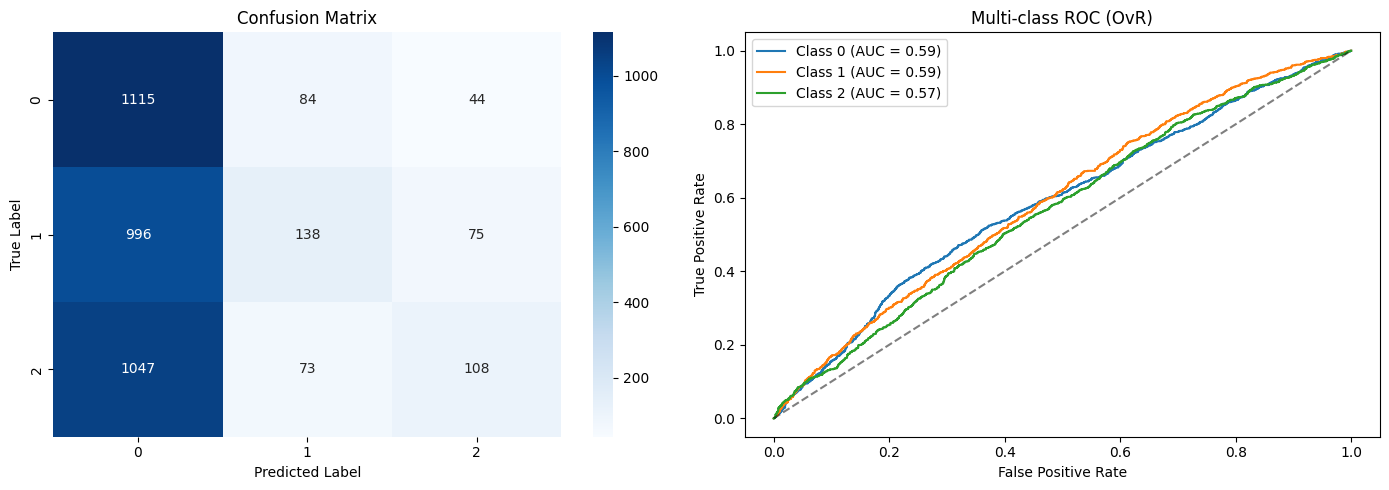

In [5]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../'))

# ModelEvaluation
from ModelEvaluation.ModelEvaluation import ModelEvaluation
# Model Evaluation
evaluator = ModelEvaluation()
evaluator.run_pipeline(y_test, y_pred, y_score)